<a href="https://colab.research.google.com/github/KitkatChunk/AbdulkaremAlani/blob/main/Road_Sign_Detection_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Road Sign Detection using YOLOv5**

# Setup Environment


In [1]:
!pip install pybboxes

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16088, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 16088 (delta 10), reused 11 (delta 1), pack-reused 16056
Receiving objects: 100% (16088/16088), 14.65 MiB | 8.51 MiB/s, done.
Resolving deltas: 100% (11042/11042), done.


In [ ]:
# cd yolov5

In [ ]:
# !pip install -r requirements.txt

In [3]:
import os
from zipfile import ZipFile
import json
import xml.etree.ElementTree as ET
from tqdm import tqdm
import pandas as pd
from collections import defaultdict
import pybboxes as pbx
import shutil
from random import shuffle
import requests

In [4]:
data = {"username": "jdenoct", "key": "49c6f0c8f975ee1daac822f48c027ab6"}

with open('kaggle.json', 'w') as outfile:
    json.dump(data, outfile)

In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
# py_link_train = 'https://www.kaggleusercontent.com/kf/112640722/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..kdEV_BzZ-5xmVOKjJtwanw.XLRlCWCzlYJReCPMfmtIMz-WH_gJfYclsT1bBYFuVYb3CpRuhU6qr0vVsLbc3ZyVFyIy9mI4uTFf4Ge0-P1aG8l4mNiqHj5nVfWOaM70QiOe8uXwYeGr-UFW49bbhQmojODAPXyZdtvqFD9NC_-21_pVnVgHJ3_TN0cbmiPuaKLsN74YxieP9Scy_i8H1n0VzbtW066EzPF-QWHybhQK1tct-Txz4bvljUE4JXw5uu9w6987qz4nppDSwEheDuBxMbzFDYaUAAkeTGq-tvghDNvp0nfYUCt7-92Ag9VId5OMwFlgRN1MHyFcJcDJdmsQeOf1oiS-4cg4mX4h3oObubxyQIkoA7Bo7n20lDjsBx5FYPXfTyfpi_80CM19d5kRmYUJ5HaKlCjupaSwbwq9Xa0wAxI4xEXAXDVItvUS3GFIck7mW5K4ljUX7w-RtkZ1TsQMtc0VLgyihnngc34Ix-GoKLYG_OJhjJg-veW-BQo05Vd2_Khf7Q4D75OADdKpSleQr9MiIpBS6TnS0bll-1VrVe3XtBuwRNFUVL0a0tbW4SccKl5O3S8E_IZQWxGtSSZK4pgDDCUiYRoEp2LpEEd8C-s8EIVib-po4cRXzwt4oJmnmnwUK8BcfiAlKIDWVjlERufuiGDMCZa39Y2r9M201dH6Trtyil-HH7Jnz50.NBoVal2C8YUnQB3aaEak7Q/yolov5/train.py'

In [ ]:
# py_link_val = 'https://www.kaggleusercontent.com/kf/112640722/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..SkRa1tQmW9JGx9ngaWVhZg.okUOiRk9mQQGQGQAO9jTyogkfoWarZa62h4UMpJQNcCroTFBDWVpbQd79bkrQOud9s51Nic0yKQOupV79PK72ALXI0vmdm0cKu-6rpzl0KE9m7W3HEdsyUR1TEEvTY29hVnyL5MwSmtiAJoiWwfkuFp6MzSCo-8Pioi4ykwJY6RYCIRqQsiPxCribzCis1_vhDYz6OQXLCgHI9daYGhNbXqopmqqLgTJghoLnKg-u8AzNYixJM15Cj0DuoYzZ9v0tqIwhHQlIXgVuqGRknmCqiaHItJw3iRMFzPGjKfKewGdwAbbv4jb_WHDkngJu_MgUaPh14dh6bI4uKRoV6CJd_Wrptw40oQyjvzSLOQo_2hoytaL_vwNY_P2_YIEgcTeHsMOYv0G9m4VxHbljmBlsJH4QIKyt2MJ3AA-U9lgdxGTwHoiRzhkbXn--hBcdZ1r07bxqpxZWrjniJEO_bGoMPilDQkK8yMe1HoCKX93l7oupCaZEcBcZZEf7vVtRs90vAQmGPA3aZ-ngvWH08-dGcBjl9vMgz8uyMr_Bi4tm1gUlMi-PmS2XgFhI1voUoBEAlldvWpxg-ifz9mnzgA7TLqf7vJi4lKw4VxYdxUw1wg18cWy6owC58CSXs3gKdGwPX-E5fZ-Hii7aA6UmXlE2WYF0z2ClcxPSmENB6-Do94.yuzDkcHCkj-lS_KmD8ckxA/yolov5/val.py'

In [ ]:
# link_lists = [py_link_train, py_link_val]

# file_name = ''

# for link in link_lists:
#   response = requests.get(link)
#   if link == py_link_train:
#     file_name = 'train.py'
#   elif link == py_link_val:
#     file_name = 'val.py'
#     if response.status_code == 200:
#         with open(f'/content/{file_name}', 'w') as file:
#             file.write(response.text)
#         print(f"File downloaded and saved as {file_name}")
#     else:
#         print("Failed to download the file")

In [6]:
# call data set from Kaggle
!kaggle datasets download -d andrewmvd/road-sign-detection

 99% 216M/218M [00:11<00:00, 22.7MB/s]
100% 218M/218M [00:11<00:00, 20.2MB/s]


In [7]:
with ZipFile('/content/road-sign-detection.zip', 'r') as zipObj:
  zipObj.extractall('/content/kaggle/input/road-sign-detection')

# Generate annotations in yolo format

## Parse xml annotations

In [8]:
input_path = '/content/kaggle/input/road-sign-detection'
output_path = '/content/kaggle/working/yolov5'

In [9]:
# create the folder
os.makedirs(output_path, exist_ok=True)

In [10]:
annotations_path = os.path.join(input_path, 'annotations')
annotations = os.listdir(annotations_path)

In [11]:
img_name_list = []
width_list = []
height_list = []
label_list = []
xmin_list = []
ymin_list = []
xmax_list = []
ymax_list = []

for idx in tqdm(range(len(annotations))):

    tree = ET.parse(os.path.join(annotations_path, annotations[idx]))
    root = tree.getroot()

    img_name = root.find('filename').text

    size = root.find('size')
    width = size.find('width').text
    height = size.find('height').text

    for group in root.findall('object'):
        label = group.find('name').text
        bbox = group.find('bndbox')
        xmin = bbox.find('xmin').text
        ymin = bbox.find('ymin').text
        xmax = bbox.find('xmax').text
        ymax = bbox.find('ymax').text

        img_name_list.append(img_name)
        width_list.append(width)
        height_list.append(height)
        xmin_list.append(xmin)
        ymin_list.append(ymin)
        xmax_list.append(xmax)
        ymax_list.append(ymax)
        label_list.append(label)

100%|██████████| 877/877 [00:00<00:00, 19800.53it/s]


In [12]:
labels_df = pd.DataFrame({
                        'img_name': img_name_list,
                        'width': width_list,
                        'height': height_list,
                        'xmin': xmin_list,
                        'ymin': ymin_list,
                        'xmax': xmax_list,
                        'ymax': ymax_list,
                        'label': label_list})
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label
0,road416.png,300,400,67,98,148,180,speedlimit
1,road867.png,300,400,73,125,124,176,speedlimit
2,road773.png,300,400,184,188,204,208,speedlimit
3,road14.png,267,400,153,202,221,347,trafficlight
4,road371.png,300,400,67,219,152,301,speedlimit


## Generate annotations in .txt format

In [13]:
classes = labels_df['label'].unique().tolist()
classes

['speedlimit', 'trafficlight', 'crosswalk', 'stop']

In [14]:
# add class number associated to classes
labels_df['class'] = labels_df['label'].apply(lambda x: classes.index(x))
labels_df.head()

,img_name,width,height,xmin,ymin,xmax,ymax,label,class
0,road416.png,300,400,67,98,148,180,speedlimit,0
1,road867.png,300,400,73,125,124,176,speedlimit,0
2,road773.png,300,400,184,188,204,208,speedlimit,0
3,road14.png,267,400,153,202,221,347,trafficlight,1
4,road371.png,300,400,67,219,152,301,speedlimit,0


In [15]:
# generate dictionary where key is image_name and value is list of all bboxes inforamtion
img_dict = defaultdict(list)

for idx in tqdm(range(len(labels_df))):
    sample_label_list = []
    img_name = labels_df.loc[idx, 'img_name']
    xmin = labels_df.loc[idx, 'xmin']
    ymin = labels_df.loc[idx, 'ymin']
    xmax = labels_df.loc[idx, 'xmax']
    ymax = labels_df.loc[idx, 'ymax']
    class_num = labels_df.loc[idx, 'class']
    W, H = int(labels_df.loc[idx, 'width']), int(labels_df.loc[idx, 'height'])

    voc_bbox = (int(xmin), int(ymin) ,int(xmax), int(ymax))

    x_center, y_center, w, h = pbx.convert_bbox(voc_bbox, from_type="voc", to_type="yolo", image_size=(W,H))

    sample_label_list.append(str(class_num))
    sample_label_list.append(str(x_center))
    sample_label_list.append(str(y_center))
    sample_label_list.append(str(w))
    sample_label_list.append(str(h))
    line = ' '.join(sample_label_list)

    img_dict[img_name].append(line)

100%|██████████| 1244/1244 [00:00<00:00, 6609.81it/s]


In [16]:
# make labels dir in data folder of yolov5
labels_dir = f'{output_path}/data/labels'
if os.path.exists(labels_dir):
  shutil.rmtree(labels_dir)
os.makedirs(labels_dir, exist_ok=True)

In [17]:
for img_name, lines in img_dict.items():
    img_name = img_name.split('.')[0]
    with open(f'{labels_dir}/{img_name}.txt', 'w') as f:
        for line in lines:
            f.write(line)
            f.write('\n')

## Generate train, val split

In [18]:
images_path = input_path + '/images'
labels_path = labels_dir   ## directory having labels in .txt format

In [19]:
# create train , val folders in data directory of yolov5
train_dir = f'{output_path}/data/train'
val_dir = f'{output_path}/data/val'

if os.path.exists(train_dir):
  shutil.rmtree(train_dir)

if os.path.exists(val_dir):
  shutil.rmtree(val_dir)

os.mkdir(train_dir)
os.mkdir(val_dir)

# train, val each containing images and labels folders
os.mkdir(train_dir + '/images')
os.mkdir(train_dir + '/labels')
os.mkdir(val_dir + '/images')
os.mkdir(val_dir + '/labels')

In [20]:
# shuffle image file names before splitting into train and val data
files = os.listdir(images_path)
shuffle(files)

In [21]:
def split(files, ratio):
    elements = len(files)
    middle = int(elements * ratio)
    return [files[:middle], files[middle:]]

def copy_files(images_path, labels_path, destination_path, files):

    for file_name in files:
        file_name = file_name.split('.')[0]

        src = images_path + f'/{file_name}.png'
        dst = destination_path + '/images'
        shutil.copy(src, dst)

        src = labels_path + f'/{file_name}.txt'
        dst = destination_path + '/labels'
        shutil.copy(src, dst)

In [22]:
images_path, labels_path, train_dir

('/content/kaggle/input/road-sign-detection/images',
 '/content/kaggle/working/yolov5/data/labels',
 '/content/kaggle/working/yolov5/data/train')

In [23]:
# split and copy files in train and val folder
train_ratio = 0.75
train_files, val_files = split(files, train_ratio)

root = 'data/traffic_sign_data'

copy_files(images_path, labels_path, train_dir, train_files)
copy_files(images_path, labels_path, val_dir, val_files)

In [24]:
assert (len(os.listdir(train_dir + '/images')) + len(os.listdir(val_dir + '/images')) == len(os.listdir(images_path)))

## Generate .yaml file

In [25]:
with open(f'{output_path}/data/sign_data.yaml', 'w') as f:
    f.write('train: ../data/train/images\n')
    f.write('val: ../data/val/images\n')
    f.write('nc: 4\n')
    f.write(f"names: {classes}")

In [26]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


## Model Training

In [28]:
epochs = 30
!python /content/yolov5/train.py --img 640 --batch 16 --epochs {epochs} --data /content/kaggle/working/yolov5/data/sign_data.yaml --weights yolov5s.pt

2023-12-04 01:21:39.399717: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-04 01:21:39.399776: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-04 01:21:39.399811: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/kaggle/working/yolov5/data/sign_data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, opt

## Visualize validation results

In [31]:
# results stored in runs/train
# get the last stored result
exp = sorted(os.listdir(output_path + '/runs/train'))[-1]
exp_path = output_path + '/runs/train/' + exp

FileNotFoundError: ignored

In [30]:
os.listdir(exp_path)

NameError: ignored

In [ ]:
img_path = f'{output_path}//runs/train/exp/val_batch2_labels.jpg'

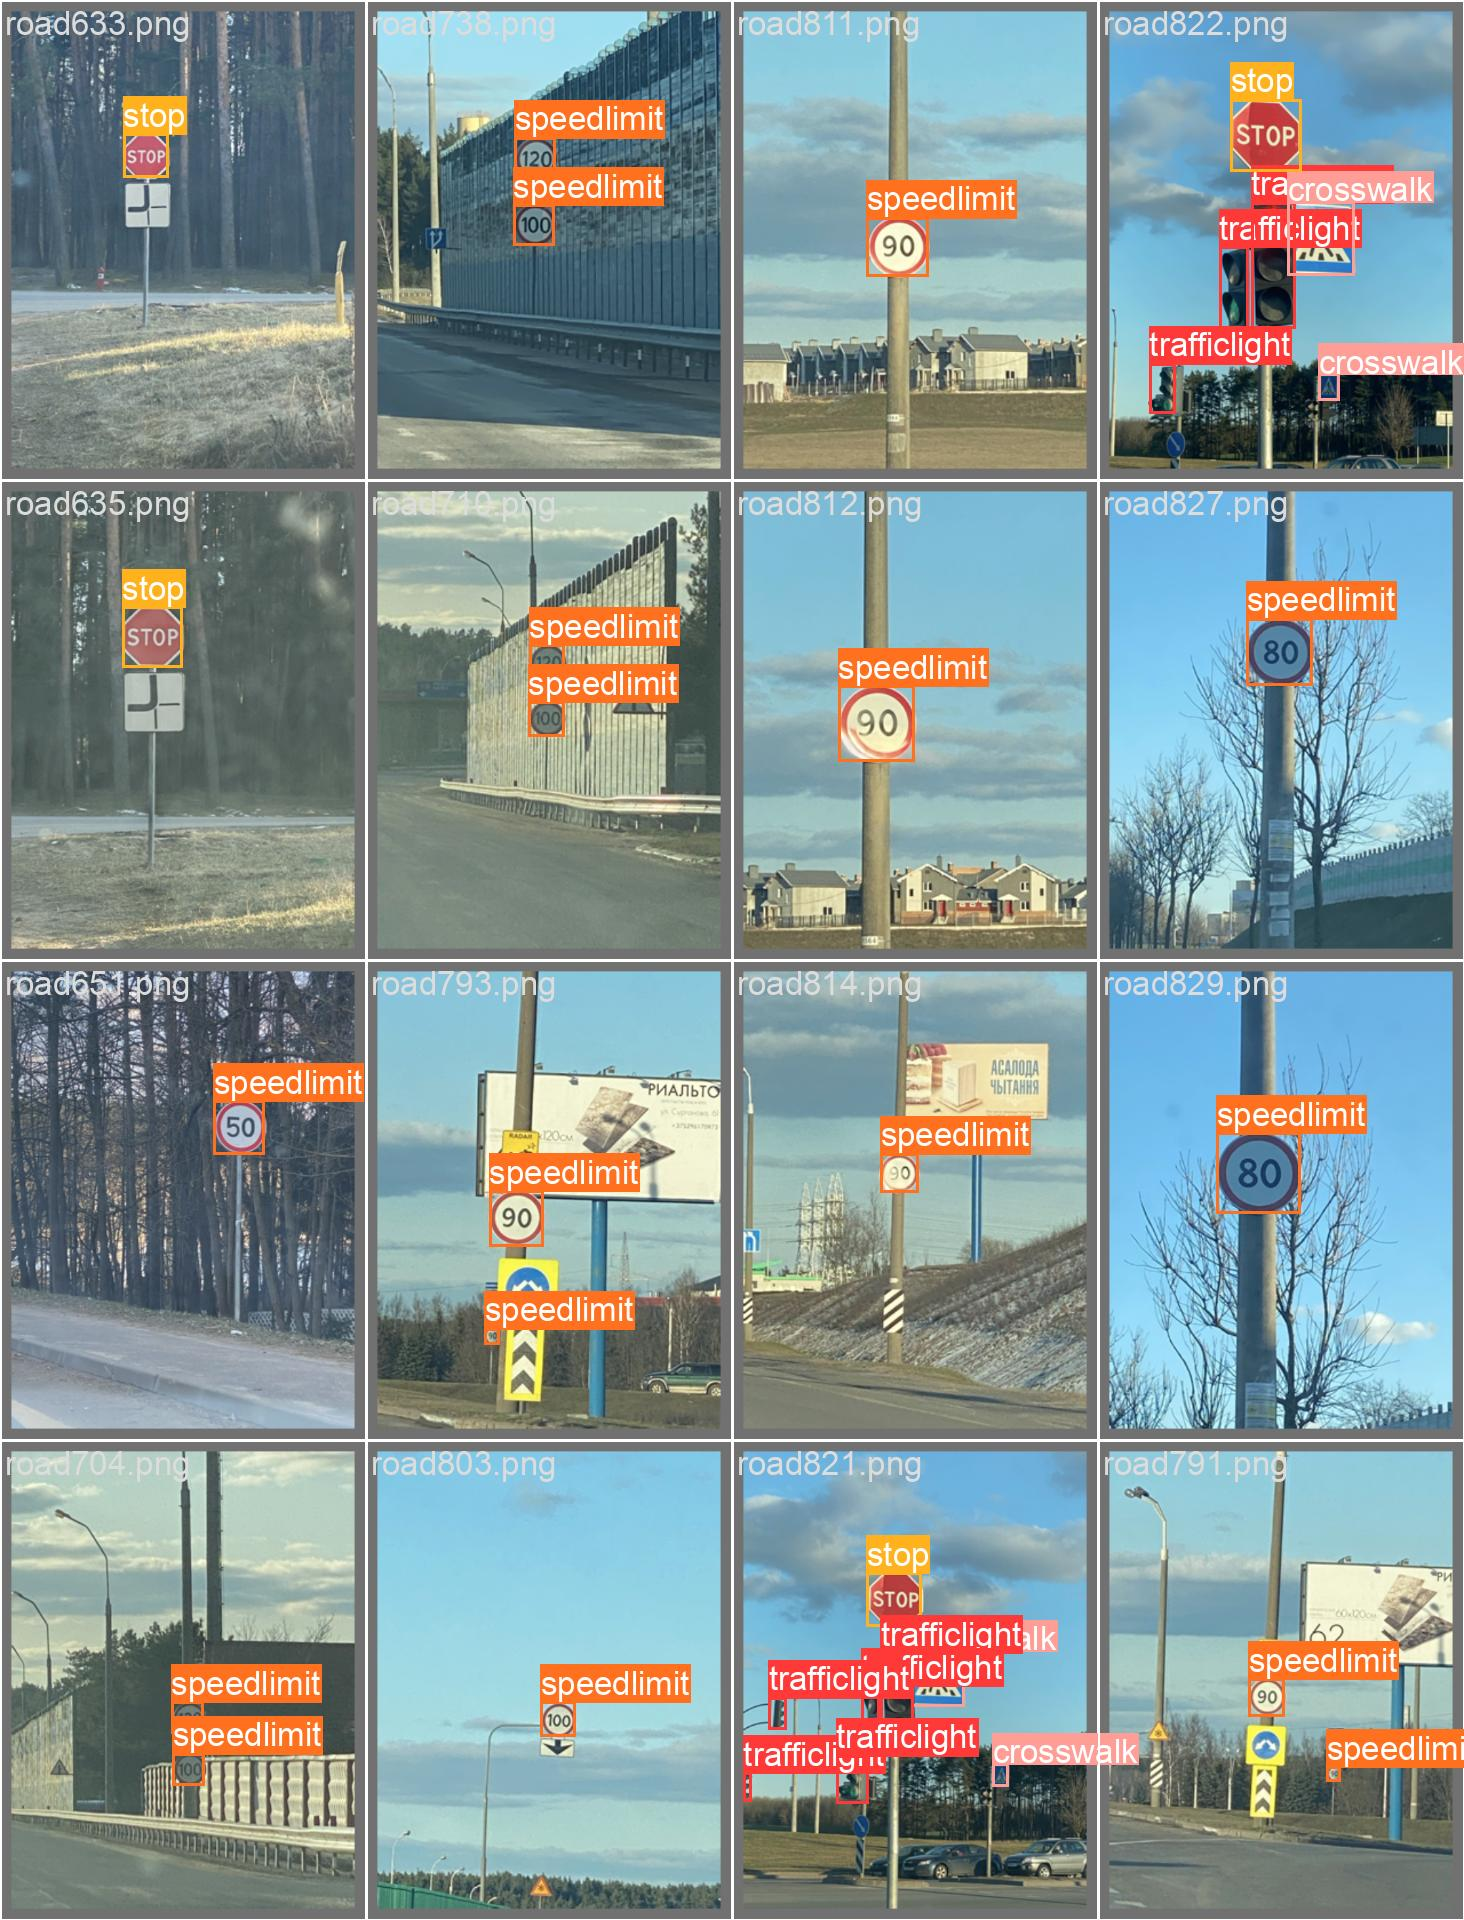

In [ ]:
from IPython.display import Image
Image(img_path)